In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

In [2]:
df = pd.read_csv('income.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.keys()

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [7]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [8]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

# Pre-Processing

##  Dropping unnecessary features 

In [9]:
df = df.drop('education', axis=1)
df = df.drop('fnlwgt', axis=1)

## One hot encoding non numerical data 

In [10]:
df = pd.concat([  df.drop('occupation', axis=1),    pd.get_dummies(df['occupation'], dtype='int').add_prefix('occupation_')  ], axis=1)      
df = pd.concat([  df.drop('workclass', axis=1),    pd.get_dummies(df['workclass'], dtype='int').add_prefix('workclass_')  ], axis=1)
df = pd.concat([  df.drop('marital-status', axis=1),    pd.get_dummies(df['marital-status'], dtype='int').add_prefix('marital-status_')  ], axis=1)   
df = pd.concat([  df.drop('relationship', axis=1),    pd.get_dummies(df['relationship'], dtype='int').add_prefix('relationship_')  ], axis=1)
df = pd.concat([  df.drop('race', axis=1),    pd.get_dummies(df['race'], dtype='int').add_prefix('race_')  ], axis=1)
df = pd.concat([  df.drop('native-country', axis=1),    pd.get_dummies(df['native-country'], dtype='int').add_prefix('native-country_')  ], axis=1)

## Binary encoding binary features   

In [11]:
df['income'].values

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [12]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [13]:
df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,1,7688,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,10,0,0,0,30,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,9,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,9,0,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,9,1,0,0,20,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# Visualization 

## First try

<Axes: >

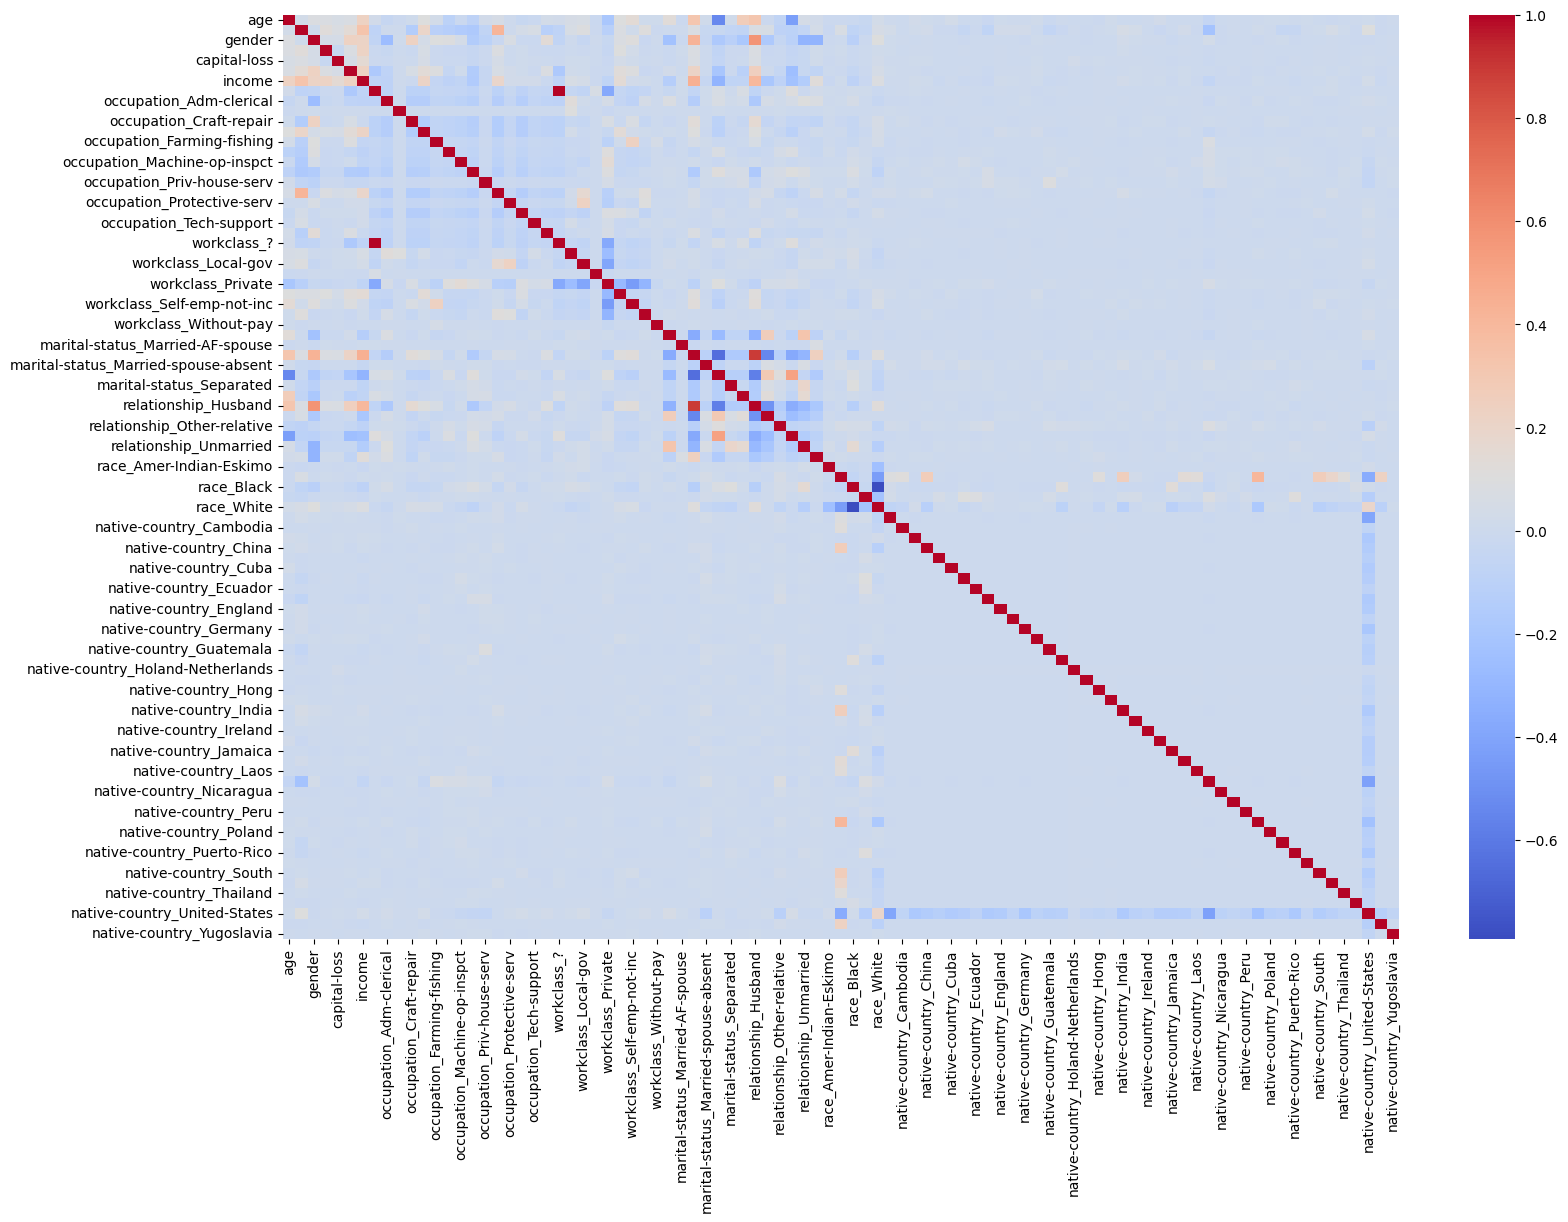

In [14]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), cmap='coolwarm')

## Simplifying the figure by removing the low correlated features with income

In [15]:
correl = df.corr()['income'].abs()
sorted_corr = correl.sort_values()
num_cols_to_drop = int(0.9 * len(df.columns))
cols_to_drop = sorted_corr.iloc[:num_cols_to_drop].index
print(cols_to_drop)
df_dropped = df.drop(cols_to_drop, axis=1)

Index(['native-country_Cuba', 'native-country_Hong',
       'native-country_Holand-Netherlands', 'native-country_Hungary',
       'native-country_Ireland', 'occupation_Armed-Forces',
       'native-country_Thailand', 'native-country_Poland',
       'native-country_Cambodia', 'native-country_Scotland',
       'native-country_Portugal', 'native-country_?',
       'native-country_Yugoslavia', 'native-country_Germany',
       'native-country_China', 'native-country_Honduras',
       'workclass_Without-pay', 'native-country_South',
       'native-country_Ecuador', 'native-country_Laos',
       'workclass_Never-worked', 'native-country_Philippines',
       'marital-status_Married-AF-spouse', 'native-country_Trinadad&Tobago',
       'native-country_Italy', 'native-country_Greece',
       'native-country_Outlying-US(Guam-USVI-etc)', 'native-country_Jamaica',
       'native-country_Iran', 'native-country_Peru', 'native-country_Haiti',
       'native-country_Japan', 'occupation_Craft-repair',
  

In [16]:
df_dropped

,age,educational-num,gender,capital-gain,hours-per-week,income,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Own-child
0,25,7,1,0,40,0,0,1,0,1
1,38,9,1,0,50,0,1,0,1,0
2,28,12,1,0,40,1,1,0,1,0
3,44,10,1,7688,40,1,1,0,1,0
4,18,10,0,0,30,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,38,0,1,0,0,0
48838,40,9,1,0,40,1,1,0,1,0
48839,58,9,0,0,40,0,0,0,0,0
48840,22,9,1,0,20,0,0,1,0,1


<Axes: >

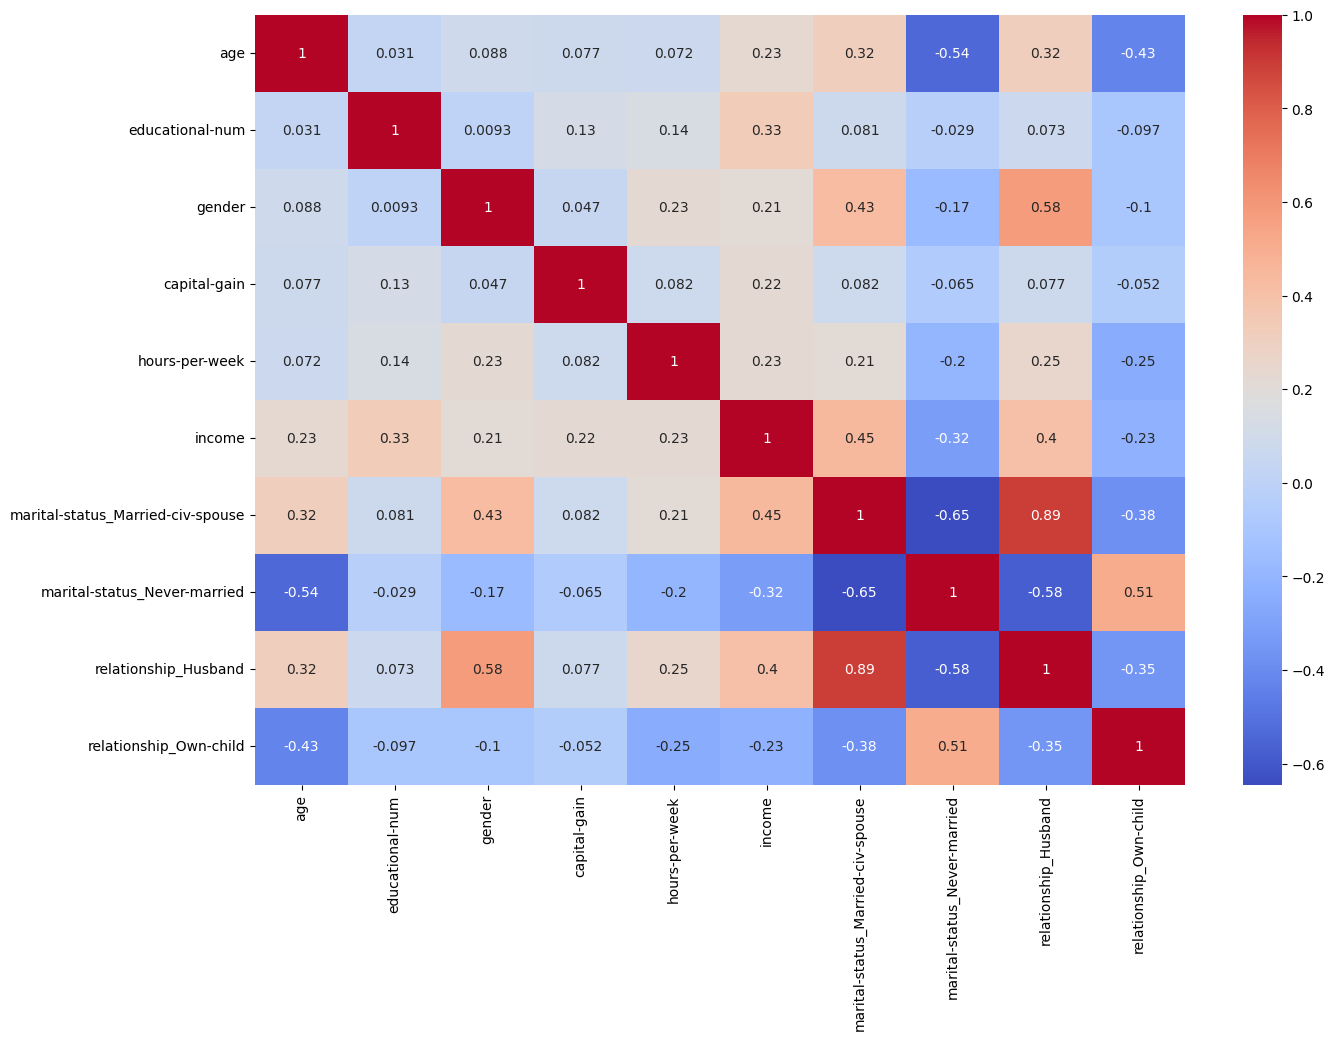

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dropped.corr(), cmap='coolwarm', annot=True)

In [18]:
df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,1,7688,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,10,0,0,0,30,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,9,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,9,0,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,9,1,0,0,20,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# The Model

## Training 

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop('income', axis=1)
y = df['income']

In [20]:
y

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

## Testing

In [23]:
model.score(X_test, y_test)

0.8561777049851571

In [24]:
model.feature_importances_

array([2.32250828e-01, 1.29961443e-01, 1.29777688e-02, 1.12953131e-01,
       3.92974615e-02, 1.15962521e-01, 1.71563508e-03, 5.05267465e-03,
       7.38759824e-05, 6.15684627e-03, 1.89790702e-02, 4.38422200e-03,
       3.31425065e-03, 3.79174178e-03, 8.09640707e-03, 1.98006058e-04,
       1.76782109e-02, 2.82685421e-03, 6.04908333e-03, 4.23783699e-03,
       4.34670192e-03, 1.83698022e-03, 5.27647267e-03, 5.52384576e-03,
       2.26793632e-06, 9.24656629e-03, 6.47971382e-03, 8.02604221e-03,
       4.48764211e-03, 1.49769048e-04, 6.87965197e-03, 2.84920933e-04,
       6.51408052e-02, 1.06520677e-03, 2.13237324e-02, 1.86068772e-03,
       1.89814322e-03, 4.31021788e-02, 1.33381161e-02, 2.10100463e-03,
       1.16845782e-02, 6.05778958e-03, 9.73136908e-03, 1.40064526e-03,
       3.12273618e-03, 4.70719521e-03, 1.02390827e-03, 6.21590446e-03,
       2.78979670e-03, 3.36756937e-04, 1.35312592e-03, 5.45859921e-04,
       3.52955166e-04, 7.69160203e-04, 2.49728017e-04, 1.68701862e-04,
      

In [25]:
model.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-mar

## Hyper Parameters Tuning 

In [26]:
importances = dict(zip(model.feature_names_in_, model.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [27]:
importances

{'age': 0.23225082809448913,
 'educational-num': 0.12996144295254392,
 'hours-per-week': 0.11596252064932745,
 'capital-gain': 0.11295313081808997,
 'marital-status_Married-civ-spouse': 0.0651408051659803,
 'relationship_Husband': 0.043102178839831674,
 'capital-loss': 0.039297461480183205,
 'marital-status_Never-married': 0.02132373241280835,
 'occupation_Exec-managerial': 0.01897907023790302,
 'occupation_Prof-specialty': 0.01767821092033486,
 'relationship_Not-in-family': 0.013338116059911375,
 'gender': 0.012977768752801964,
 'relationship_Own-child': 0.011684578155584244,
 'relationship_Wife': 0.00973136908452223,
 'workclass_Private': 0.009246566285367961,
 'occupation_Other-service': 0.008096407070575238,
 'workclass_Self-emp-not-inc': 0.008026042214820941,
 'marital-status_Divorced': 0.006879651974032595,
 'workclass_Self-emp-inc': 0.006479713816172318,
 'native-country_United-States': 0.006411398574069127,
 'race_White': 0.006215904464908187,
 'occupation_Craft-repair': 0.0061

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100,250],
    'max_depth':[5,10,30,None],
    'min_samples_split':[2,4],
    'max_features': ['sqrt', 'log2']
    
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid, 
                           verbose=10, n_jobs=-1)

In [29]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 2/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 2/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 5/5; 2/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 3/5; 2/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 2/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 3/5; 3/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [30]:
model = grid_search.best_estimator_

In [31]:
model.score(X_test, y_test)

0.8687685535878801

In [32]:
importances = dict(zip(model.feature_names_in_, model.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [33]:
importances

{'age': 0.14855362441317507,
 'educational-num': 0.13874923095143565,
 'capital-gain': 0.12549020584152648,
 'hours-per-week': 0.09279961127329875,
 'relationship_Husband': 0.0728209050428979,
 'marital-status_Married-civ-spouse': 0.06926635524950481,
 'capital-loss': 0.04474053083161091,
 'marital-status_Never-married': 0.03544870746021164,
 'occupation_Exec-managerial': 0.02496417218365434,
 'occupation_Prof-specialty': 0.021108893931081382,
 'relationship_Not-in-family': 0.018151539675179167,
 'gender': 0.01776993611423113,
 'relationship_Wife': 0.01582334522643319,
 'relationship_Own-child': 0.0106312696621182,
 'occupation_Other-service': 0.010442324321431553,
 'workclass_Private': 0.008429816896036323,
 'marital-status_Divorced': 0.00824205110583518,
 'workclass_Self-emp-not-inc': 0.00817459684738687,
 'relationship_Unmarried': 0.007528311910314016,
 'workclass_Self-emp-inc': 0.0071261497317716286,
 'native-country_United-States': 0.00617658162837601,
 'race_White': 0.00573843959